<a href="https://colab.research.google.com/github/RaivoKasepuu/BDA_Tartu_MTAT_03_319/blob/master/BDAFall2021_HW6_Raivo_Kasepuu_Maarja_Parve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 06  </font></center></h1>
<h2><center> <font color='black'> Cross and Up Selling</font></center></h2>   
<h2><center> <font color='black'> MTAT.03.319 - Business Data Analytics</font></center></h2>
<h2><center> <font color='black'> University of Tartu - Fall 2021</font></center></h2>
</div>


# Homework instructions
- Please name your homeworks in the following format **BDAFall2021_HWX_Name_Surname.ipynb** then it will be easier to grade your homeworks and smaller possibility for a human mistake.
- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name and student ID. 

- The accepted submission formats are Colab links or .ipynb files. If you are submitting Colab links please make sure that the privacy settings for the file is public so we can access your code. 

- The submission will automatically close on <font color='red'>**1 December at 23:59**</font>, so please make sure to submit before the deadline. 

- ONLY one of the teammates should submit the homework. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.

- If a question is not clear, please ask us in Moodle ONLY. 

- For coding related questions, do submit your code as well as your explanation/answer.

- After you have finished solving the Homework, please restart the Kernel and run all the cells to check if there is any persisting issues. 

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://www.ut.ee/en/current-students/academic-fraud).

- Please <font color='red'>do not change</font> the template of this notebook file. You can download the .ipynb file and work on that.

**<h2><font color='red'>Team mates:</font></h2>**


<font color='#0072ce'>Name: Raivo Kasepuu</font>&emsp;   <font color='#0072ce'>Student ID: B710710</font>


<font color='#0072ce'>Name: Maarja Parve</font>&emsp;   <font color='#0072ce'>Student ID: B99902</font>

In [ ]:
print("Hello! It is time to enjoy yet another BDA homework made by Maarja and Raivo!")
print("This time we got some inspiration from Star Wars new episodes we want to make together with LucasFilm and Alexander Suvorov")
print("Alexander Suvorov: No battle can be won in the study, and theory without practice is dead.")
print("https://www.azquotes.com/quote/924993")

Hello! It is time to enjoy yet another BDA homework made by Maarja and Raivo!
This time we got some inspiration from Star Wars new episodes we want to make together with LucasFilm and Alexander Suvorov
Alexander Suvorov: No battle can be won in the study, and theory without practice is dead.
https://www.azquotes.com/quote/924993


# Question 1 (3 points)
In this homework we will use recommender systems on cs_books.csv dataset to recommend computer science books to users. The dataset consists of three columns:
* User - name of a user
* Book - title of a book
* Rating - rating to a book given by a user

Load the data, and make a simple exploratory analysis:



In [ ]:
print("We have to run this script, if we do not have buzzy -fuzzy - wuzzy - mussy installed...")
!pip install fuzzywuzzy

import os
import time

print("Science stuff imports...")
import math
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

print("buzzy-fuzzy-wuzzy-muzzy...")
from fuzzywuzzy import fuzz

print("A good HW must have good national style visualizations... Just import it!")
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

We have to run this script, if we do not have buzzy -fuzzy - wuzzy - mussy installed...
Science stuff imports...
buzzy-fuzzy-wuzzy-muzzy...
A good HW must have good national style visualizations... Just import it!


In [ ]:
print("Let see, what weapons for the Battle we have today...")
books = pd.read_csv("cs_books.csv")
books.head()



Let see, what weapons for the Battle we have today...


,user,book,rating
0,Marvin Minsky,Artificial intelligence,5.00
1,Marvin Minsky,Systems programming,2.54
2,Marvin Minsky,Computation,4.32
3,Marvin Minsky,Algorithms,2.76
4,Donald Knuth,Systems programming,3.57


In [ ]:
print("We have to check, if there are any NULL values")
books.isnull().values.any()
books.info()

We have to check, if there are any NULL values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   user    359 non-null    object 
 1   book    359 non-null    object 
 2   rating  359 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.5+ KB


## Question 1.1 (1 p)
Plot distribution histogram of book's rating. If a customer didn't rate a book, consider it as a rating zero.

In [ ]:
print("It is time to get rating count...")
ratings_by_count_ini = pd.DataFrame(books.groupby('rating').size(), columns=['count'])
print ("As we can see, there are no 0-rated books")
ratings_by_count_ini



It is time to get rating count...
As we can see, there are no 0-rated books


,count
rating,
1.02,2
1.04,2
1.06,1
1.08,1
1.09,2
...,...
4.93,1
4.95,1
4.98,1


In [ ]:
print("Let's find out if every user has rated all of the books and done their job correctly")
print("For that we have to find out how many unique users and books are in the dataset")
num_users = len(books.user.unique())
num_books = len(books.book.unique())
print('There are {} unique users and {} unique movies in this dataset'.format(num_users, num_books))
print("So there should be " + str(num_users*num_books) + " ratings" + ", but we only have " + str( books.shape[0]))
total_cnt = num_users * num_books
rating_zero_cnt = total_cnt - books.shape[0]

Let's find out if every user has rated all of the books and done their job correctly
For that we have to find out how many unique users and books are in the dataset
There are 78 unique users and 9 unique movies in this dataset
So there should be 702 ratings, but we only have 359


In [ ]:
print("So we have to bring in the silent soldiers and add the 0-ratings")
ratings_by_count = ratings_by_count_ini.append(
    pd.DataFrame({'count': rating_zero_cnt}, index=[0.0]),
    verify_integrity=True,
).sort_index()
ratings_by_count

So we have to bring in the silent soldiers and add the 0-ratings


,count
0.00,343
1.02,2
1.04,2
1.06,1
1.08,1
...,...
4.93,1
4.95,1
4.98,1
4.99,1


We are proud to present our first plot - Rating frequency of all ratings


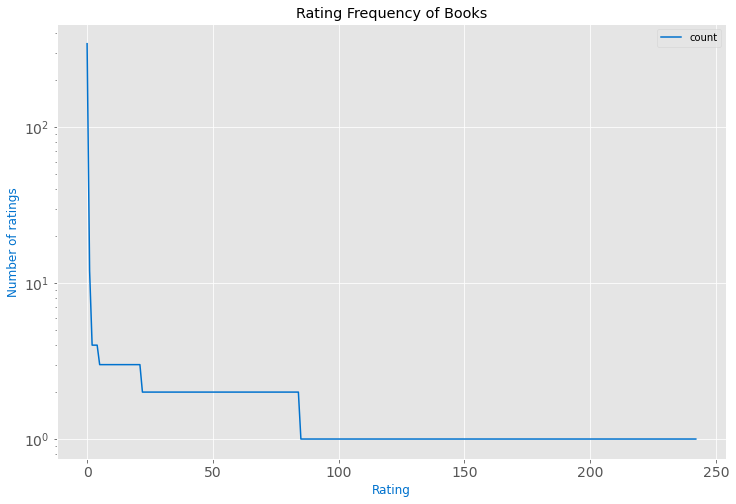

In [ ]:
print("We are proud to present our first plot - Rating frequency of all ratings")
ax = ratings_by_count.sort_values('count', ascending=False) \
    .reset_index(drop=True).plot(
        figsize=(12, 8),
        title='Rating Frequency of Books',
        fontsize=14,
        #if needed the log function
        logy=True,
        color='#0072ce'
    )
ax.set_xlabel("Rating", color='#0072ce')
ax.set_ylabel("Number of ratings", color='#0072ce');


Let´s see how the rating score distribution is


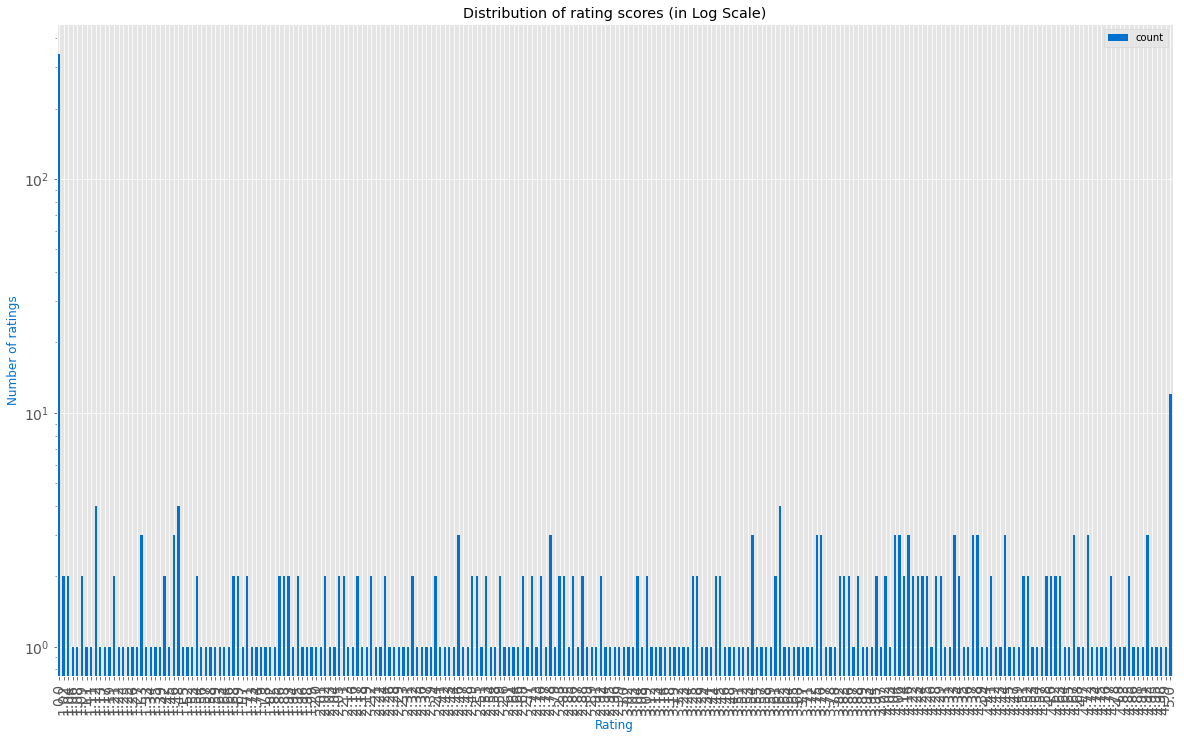

In [ ]:
print("Let´s see how the rating score distribution is")

ax = ratings_by_count[['count']].reset_index().rename(columns={'index': 'rating score'}).plot(
    x='rating score',
    y='count',
    kind='bar',
    figsize=(20, 12),
    title='Distribution of rating scores (in Log Scale)',
    logy=True,
    fontsize=14,
    color = '#0072ce'
)
ax.set_xlabel("Rating", color='#0072ce')
ax.set_ylabel("Number of ratings", color='#0072ce');

## Question 1.2 (1 p)
Plot books' rating frequency of each book.  On the y-axis, you have the count of ratings a book has and on the x-axis, unique books. Does it have a long-tail property (remember that the cs_books dataset is much smaller than books ratings, so the property might not be that expressive)?


In [ ]:
print("Lets get book rating count")
book_ratings_by_count = pd.DataFrame(books.groupby('book').size(), columns=['count'])
book_ratings_by_count

Lets get book rating count


,count
book,
Algorithms,41
Artificial intelligence,37
Computation,39
Concurrency,44
Databases,34
Formal methods,40
Programming language theory,41
Software engineering,35
Systems programming,48


It is time to plot book rating frequency of all books...


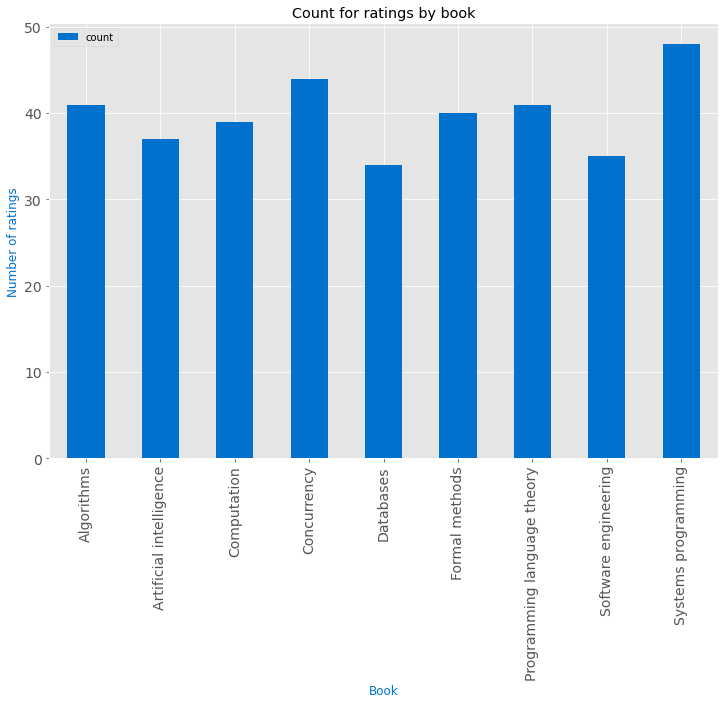

In [ ]:
print("It is time to plot book rating frequency of all books...")
ax = book_ratings_by_count[['count']].reset_index().rename(columns={'index': 'book'}).plot(
    x='book',
    y='count',
    kind='bar',
    figsize=(12, 8),
    title='Count for ratings by book',
    fontsize=14,
    color='#0072ce'
)
ax.set_xlabel("Book", color='#0072ce')
ax.set_ylabel("Number of ratings", color='#0072ce');

## Question 1.3 (1 p)
Plot users rating frequency. On the y-axis, you have a count of ratings that a user made and unique users on the x-axis. Does it have long-tail property? 

In [ ]:
print(" now we will get users rating count...")
users_ratings_by_count = pd.DataFrame(books.groupby('user').size(), columns=['count'])
users_ratings_by_count

 now we will get users rating count...


,count
user,
Alan Perlis,4
Alishba Gaines,7
Angelika Smart,4
Antoinette Dalby,4
Antonia Shannon,5
...,...
Verity Miles,7
Wilma Sloan,4
Xavier Copeland,3


Yet another plot... Rating frequency of all ratings


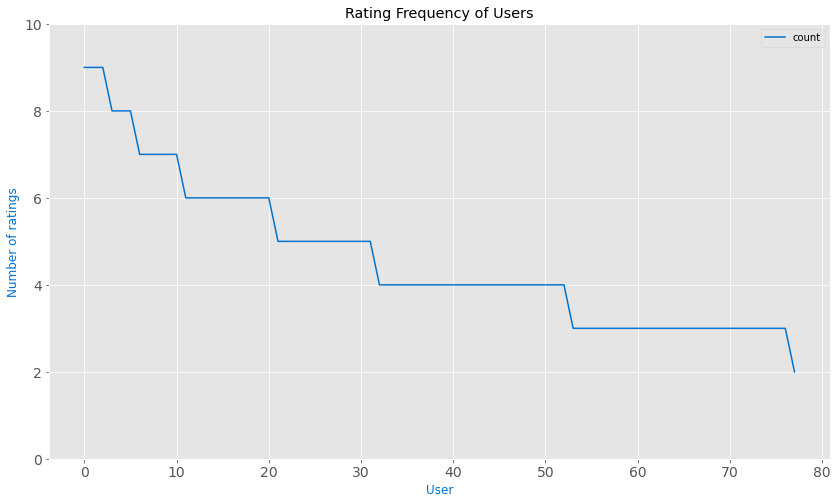

In [ ]:
print("Yet another plot... Rating frequency of all ratings")
ax = users_ratings_by_count.sort_values('count', ascending=False) \
    .reset_index(drop=True)\
    .plot(
        figsize=(14, 8),
        title='Rating Frequency of Users',
        fontsize=14,
        color='#0072ce'
    )
ax.set_ylim([0,10]) #Let's start from zero
ax.set_xlabel("User", color='#0072ce')
ax.set_ylabel("Number of ratings", color='#0072ce');

Does it have long-tail property?

No, it does not!

# Question 2 (3 points)

Prepare the data for KNN model:


## Question 2.1 (1 p)
Create a book-user matrix using the df.pivot function and fill NA with zeroes. In other words, in places where a user didn't rate a book, we will have 0 instead of NA. In the table, you should have only one column for each user and only one row for each book present in the cs_books.csv

In [ ]:
print("Pivot and creation of book-user matrix")
book_user_mat = books.pivot(index='book', columns='user', values='rating').fillna(0)
book_user_mat.head()

Pivot and creation of book-user matrix


user,Alan Perlis,Alishba Gaines,Angelika Smart,Antoinette Dalby,Antonia Shannon,Benny Li,Chyna Kemp,Clive Strong,Conor Dickson,Danyl Connor,Darrel Thorne,Dennis Ritchie,Desiree Riley,Donald Knuth,Drew Peck,Edgar Codd,Edsger Dijkstra,Ellice Haas,Emeli Ponce,Emer Irwin,Eshal Philip,Fabien Sanchez,Farrah Traynor,Fenton Higgs,Francesco Hutton,Hakim Cherry,Hester Dunn,Huma Delaney,Idris William,Iga Reyes,Iolo Howell,Irfan Heaton,Jane Bouvet,Jasleen Flynn,Javier Donovan,Jax Sawyer,Joao Hammond,John Backus,John McCarthy,Kai Plummer,Kristy Cantrell,Lacey-Mai Neal,Leandro Warner,Leigh Zhang,Leslie Lamport,Linzi Mcgill,Lloyd Currie,Louie Fowler,Lyndsey Ahmed,Macauley Mustafa,Marvin Minsky,Maysa Whyte,Michael Stonebraker,Milla Callahan,Mohammod Mccabe,Niklaus Wirth,Nikolas Legge,Robert Floyd,Robin Milner,Roshan Charles,Safiyah Humphrey,Saima Kearns,Salma Ellis,Samad Wilkinson,Shane Mayer,Sultan Armstrong,Ted Weber,Teddy Emery,Thierry Truong,Tony Hoare,Tyler-James Cleveland,Tymon Sweeney,Ursula Nichols,Verity Miles,Wilma Sloan,Xavier Copeland,Zackery Woodcock,Zakariyya Pemberton
book,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Algorithms,0.00,2.95,3.44,1.11,0.00,0.00,1.26,0.00,0.00,0.00,1.39,0.0,0.00,5.00,1.58,0.00,4.92,2.90,3.54,1.73,1.85,0.00,0.00,1.42,4.65,4.41,0.00,4.44,3.45,4.63,0.00,1.88,0.00,0.00,0.00,0.00,4.26,0.0,3.03,0.00,0.00,2.79,4.49,2.85,4.63,0.00,0.00,2.92,0.00,0.00,2.76,2.89,0.00,2.83,3.76,3.95,0.00,5.00,0.00,0.00,0.00,2.00,2.03,0.00,0.00,0.00,0.0,4.44,0.00,4.38,4.02,2.46,2.18,0.00,1.23,0.00,3.29,0.00
Artificial intelligence,1.46,3.75,0.00,2.41,2.02,0.00,0.00,0.00,0.00,1.68,0.00,0.0,3.12,0.00,3.51,0.00,0.00,0.00,2.68,4.91,4.95,4.28,0.00,0.00,1.09,0.00,1.99,0.00,2.40,0.00,3.93,0.00,1.13,1.33,0.00,0.00,1.19,0.0,5.00,4.92,4.16,3.53,3.20,0.00,0.00,2.13,3.62,0.00,1.69,0.00,5.00,0.00,0.00,2.88,3.19,0.00,0.00,0.00,0.00,2.73,2.20,0.00,0.00,0.00,0.00,2.30,0.0,1.27,0.00,0.00,1.17,2.80,0.00,1.68,0.00,0.00,0.00,1.57
Computation,0.00,4.57,0.00,3.25,0.00,4.70,0.00,2.36,0.00,0.00,0.00,0.0,0.00,4.39,2.86,0.00,0.00,4.44,1.04,4.06,1.10,2.33,1.56,4.22,3.04,3.28,0.00,0.00,4.06,0.00,2.01,2.05,2.37,0.00,4.33,0.00,3.87,0.0,3.23,1.98,0.00,0.00,3.14,4.67,0.00,0.00,0.00,1.48,0.00,0.00,4.32,0.00,0.00,1.30,4.99,0.00,0.00,3.18,0.00,0.00,0.00,3.62,0.00,1.86,1.02,3.46,0.0,0.00,4.42,0.00,3.61,0.00,0.00,2.53,0.00,0.00,2.26,1.74
Concurrency,0.00,2.83,0.00,0.00,3.63,3.75,0.00,0.00,4.73,3.41,0.00,0.0,4.37,0.00,3.49,4.28,3.97,2.28,4.37,2.78,4.35,0.00,2.04,0.00,0.00,3.75,0.00,0.00,2.78,0.00,0.00,3.78,2.21,4.04,0.00,0.00,2.24,0.0,3.61,4.02,2.70,1.09,0.00,0.00,5.00,1.48,2.24,2.50,4.37,0.00,0.00,0.00,4.14,1.54,0.00,0.00,4.77,2.92,4.62,0.00,3.76,0.00,0.00,2.44,1.48,0.00,0.0,0.00,4.31,4.88,0.00,0.00,4.92,2.78,4.85,4.14,0.00,4.25
Databases,2.32,1.96,0.00,4.03,1.86,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,3.65,5.00,0.00,3.04,1.80,2.31,1.82,0.00,0.00,0.00,3.16,0.00,4.77,4.47,3.48,4.80,0.00,0.00,0.00,0.00,1.22,2.48,1.30,2.8,0.00,0.00,0.00,0.00,4.60,0.00,0.00,0.00,3.13,2.19,1.34,4.85,0.00,4.86,5.00,2.66,3.44,0.00,0.00,0.00,0.00,4.54,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,3.88,0.00,0.00,1.63,1.71,4.68,4.76,0.00


## Question 2.2 (1 p)
 Build a sparse matrix for the pivoted dataframe.

In [ ]:
book_user_mat_sparse = csr_matrix(book_user_mat.values)

print(f"Sparse matrix:{book_user_mat_sparse}")

Sparse matrix:  (0, 1)	2.95
  (0, 2)	3.44
  (0, 3)	1.11
  (0, 6)	1.26
  (0, 10)	1.39
  (0, 13)	5.0
  (0, 14)	1.58
  (0, 16)	4.92
  (0, 17)	2.9
  (0, 18)	3.54
  (0, 19)	1.73
  (0, 20)	1.85
  (0, 23)	1.42
  (0, 24)	4.65
  (0, 25)	4.41
  (0, 27)	4.44
  (0, 28)	3.45
  (0, 29)	4.63
  (0, 31)	1.88
  (0, 36)	4.26
  (0, 38)	3.03
  (0, 41)	2.79
  (0, 42)	4.49
  (0, 43)	2.85
  (0, 44)	4.63
  :	:
  (8, 34)	1.69
  (8, 36)	4.53
  (8, 37)	4.43
  (8, 38)	3.25
  (8, 40)	1.46
  (8, 42)	4.29
  (8, 44)	2.76
  (8, 47)	2.02
  (8, 49)	4.75
  (8, 50)	2.54
  (8, 52)	4.67
  (8, 53)	2.77
  (8, 55)	4.22
  (8, 56)	2.86
  (8, 57)	2.17
  (8, 58)	1.66
  (8, 60)	2.59
  (8, 61)	1.7
  (8, 65)	4.62
  (8, 66)	3.64
  (8, 69)	4.38
  (8, 71)	1.46
  (8, 73)	2.88
  (8, 75)	2.99
  (8, 76)	3.86


## Question 2.3 (1 p)
Build a book_to_index mapper - dictionary where key is a book and value is a correspondent index.  It should look like this:<br />
{'Algorithms': 0,<br />
 'Artificial intelligence': 1,<br />
 'Computation': 2,
 ....}<br />

In [ ]:
print("Mapper creation")

#create a dictionary
book_to_index = {}

print()
print("Python for Dummies:") 
print("Adding items to dictionary:")
print('dictionary_name["key"] = "value"')
print()

book_to_index["Algorithms"] = int(0)
book_to_index["Artificial intelligence"] = int(1)
book_to_index["Computation"] = int(2)
book_to_index["Concurrency"] = int(3)
book_to_index["Databases"] = int(4)
book_to_index["Formal methods"] = int(5)
book_to_index["Programming language theory"] = int(6)
book_to_index["Software engineering"] = int(7)
book_to_index["Systems programming"] = int(8)

print(book_to_index)

Mapper creation

Python for Dummies:
Adding items to dictionary:
dictionary_name["key"] = "value"

{'Algorithms': 0, 'Artificial intelligence': 1, 'Computation': 2, 'Concurrency': 3, 'Databases': 4, 'Formal methods': 5, 'Programming language theory': 6, 'Software engineering': 7, 'Systems programming': 8}


Please, show the pivoted dataframe, the sparse matrix and the mapper.

In [ ]:
print("Pivoted dataframe")
book_user_mat

Pivoted dataframe


user,Alan Perlis,Alishba Gaines,Angelika Smart,Antoinette Dalby,Antonia Shannon,Benny Li,Chyna Kemp,Clive Strong,Conor Dickson,Danyl Connor,Darrel Thorne,Dennis Ritchie,Desiree Riley,Donald Knuth,Drew Peck,Edgar Codd,Edsger Dijkstra,Ellice Haas,Emeli Ponce,Emer Irwin,Eshal Philip,Fabien Sanchez,Farrah Traynor,Fenton Higgs,Francesco Hutton,Hakim Cherry,Hester Dunn,Huma Delaney,Idris William,Iga Reyes,Iolo Howell,Irfan Heaton,Jane Bouvet,Jasleen Flynn,Javier Donovan,Jax Sawyer,Joao Hammond,John Backus,John McCarthy,Kai Plummer,Kristy Cantrell,Lacey-Mai Neal,Leandro Warner,Leigh Zhang,Leslie Lamport,Linzi Mcgill,Lloyd Currie,Louie Fowler,Lyndsey Ahmed,Macauley Mustafa,Marvin Minsky,Maysa Whyte,Michael Stonebraker,Milla Callahan,Mohammod Mccabe,Niklaus Wirth,Nikolas Legge,Robert Floyd,Robin Milner,Roshan Charles,Safiyah Humphrey,Saima Kearns,Salma Ellis,Samad Wilkinson,Shane Mayer,Sultan Armstrong,Ted Weber,Teddy Emery,Thierry Truong,Tony Hoare,Tyler-James Cleveland,Tymon Sweeney,Ursula Nichols,Verity Miles,Wilma Sloan,Xavier Copeland,Zackery Woodcock,Zakariyya Pemberton
book,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Algorithms,0.00,2.95,3.44,1.11,0.00,0.00,1.26,0.00,0.00,0.00,1.39,0.00,0.00,5.00,1.58,0.00,4.92,2.90,3.54,1.73,1.85,0.00,0.00,1.42,4.65,4.41,0.00,4.44,3.45,4.63,0.00,1.88,0.00,0.00,0.00,0.00,4.26,0.00,3.03,0.00,0.00,2.79,4.49,2.85,4.63,0.00,0.00,2.92,0.00,0.00,2.76,2.89,0.00,2.83,3.76,3.95,0.00,5.00,0.00,0.00,0.00,2.00,2.03,0.00,0.00,0.00,0.00,4.44,0.00,4.38,4.02,2.46,2.18,0.00,1.23,0.00,3.29,0.00
Artificial intelligence,1.46,3.75,0.00,2.41,2.02,0.00,0.00,0.00,0.00,1.68,0.00,0.00,3.12,0.00,3.51,0.00,0.00,0.00,2.68,4.91,4.95,4.28,0.00,0.00,1.09,0.00,1.99,0.00,2.40,0.00,3.93,0.00,1.13,1.33,0.00,0.00,1.19,0.00,5.00,4.92,4.16,3.53,3.20,0.00,0.00,2.13,3.62,0.00,1.69,0.00,5.00,0.00,0.00,2.88,3.19,0.00,0.00,0.00,0.00,2.73,2.20,0.00,0.00,0.00,0.00,2.30,0.00,1.27,0.00,0.00,1.17,2.80,0.00,1.68,0.00,0.00,0.00,1.57
Computation,0.00,4.57,0.00,3.25,0.00,4.70,0.00,2.36,0.00,0.00,0.00,0.00,0.00,4.39,2.86,0.00,0.00,4.44,1.04,4.06,1.10,2.33,1.56,4.22,3.04,3.28,0.00,0.00,4.06,0.00,2.01,2.05,2.37,0.00,4.33,0.00,3.87,0.00,3.23,1.98,0.00,0.00,3.14,4.67,0.00,0.00,0.00,1.48,0.00,0.00,4.32,0.00,0.00,1.30,4.99,0.00,0.00,3.18,0.00,0.00,0.00,3.62,0.00,1.86,1.02,3.46,0.00,0.00,4.42,0.00,3.61,0.00,0.00,2.53,0.00,0.00,2.26,1.74
Concurrency,0.00,2.83,0.00,0.00,3.63,3.75,0.00,0.00,4.73,3.41,0.00,0.00,4.37,0.00,3.49,4.28,3.97,2.28,4.37,2.78,4.35,0.00,2.04,0.00,0.00,3.75,0.00,0.00,2.78,0.00,0.00,3.78,2.21,4.04,0.00,0.00,2.24,0.00,3.61,4.02,2.70,1.09,0.00,0.00,5.00,1.48,2.24,2.50,4.37,0.00,0.00,0.00,4.14,1.54,0.00,0.00,4.77,2.92,4.62,0.00,3.76,0.00,0.00,2.44,1.48,0.00,0.00,0.00,4.31,4.88,0.00,0.00,4.92,2.78,4.85,4.14,0.00,4.25
Databases,2.32,1.96,0.00,4.03,1.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.65,5.00,0.00,3.04,1.80,2.31,1.82,0.00,0.00,0.00,3.16,0.00,4.77,4.47,3.48,4.80,0.00,0.00,0.00,0.00,1.22,2.48,1.30,2.80,0.00,0.00,0.00,0.00,4.60,0.00,0.00,0.00,3.13,2.19,1.34,4.85,0.00,4.86,5.00,2.66,3.44,0.00,0.00,0.00,0.00,4.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.88,0.00,0.00,1.63,1.71,4.68,4.76,0.00
Formal methods,0.00,0.00,4.04,0.00,1.95,4.72,1.12,0.00,0.00,0.00,3.82,0.00,0.00,0.00,4.40,1.53,5.00,2.29,0.00,3.80,0.00,0.00,0.00,3.28,4.41,2.61,0.00,0.00,1.48,0.00,1.93,0.00,0.00,1.79,0.00,1.08,2.22,2.42,3.58,3.54,0.00,0.00,1.02,2.40,4.93,0.00,0.00,2.64,1.21,4.29,0.00,3.89,0.00,2.16,0.00,3.83,4.67,5.00,3.94,0.00,0.00,3.59,1.95,4.51,0.00,0.00,0.00,0.00,0.00,4.72,0.00,0.00,0.00,4.52,2.10,0.00,0.00,3.09
Programming language theory,0.00,2.59,4.33,0.00,3.09,3.02,0.00,0.00,0.00,4.45,1.06,3.45,0.00,4.33,1.42,0.00,4.34,4.36,0.00,1.59,0.00,0.00,0.00,0.00,4.98,4.16,0.00,0.00,0.00,0.00,3.55,0.00,0.00,0.00,0.00,3.95,0.00,4.58,4.72,2.71,2.71,0.00,3.83,3.71,1.50,0.00,0.00,0.00,2.58,0.00,0.00,1.25,0.00,3.82,0.00,4.23,4.34,4.24,5.00,0.00,1.52,2.49,4.23,1.04,4.25,0.00,1.30,1.12,2.53,4.64,0.00,0.00,0.00,1.64,0.00,0.00,2

In [ ]:
print("Star Wars: The Sparse matrix")
print(f"Sparse matrix:{book_user_mat_sparse}")

Star Wars: The Sparse matrix
Sparse matrix:  (0, 1)	2.95
  (0, 2)	3.44
  (0, 3)	1.11
  (0, 6)	1.26
  (0, 10)	1.39
  (0, 13)	5.0
  (0, 14)	1.58
  (0, 16)	4.92
  (0, 17)	2.9
  (0, 18)	3.54
  (0, 19)	1.73
  (0, 20)	1.85
  (0, 23)	1.42
  (0, 24)	4.65
  (0, 25)	4.41
  (0, 27)	4.44
  (0, 28)	3.45
  (0, 29)	4.63
  (0, 31)	1.88
  (0, 36)	4.26
  (0, 38)	3.03
  (0, 41)	2.79
  (0, 42)	4.49
  (0, 43)	2.85
  (0, 44)	4.63
  :	:
  (8, 34)	1.69
  (8, 36)	4.53
  (8, 37)	4.43
  (8, 38)	3.25
  (8, 40)	1.46
  (8, 42)	4.29
  (8, 44)	2.76
  (8, 47)	2.02
  (8, 49)	4.75
  (8, 50)	2.54
  (8, 52)	4.67
  (8, 53)	2.77
  (8, 55)	4.22
  (8, 56)	2.86
  (8, 57)	2.17
  (8, 58)	1.66
  (8, 60)	2.59
  (8, 61)	1.7
  (8, 65)	4.62
  (8, 66)	3.64
  (8, 69)	4.38
  (8, 71)	1.46
  (8, 73)	2.88
  (8, 75)	2.99
  (8, 76)	3.86


In [ ]:
print("Star Wars: The Mapper returns...")
print(book_to_index)

Star Wars: The Mapper returns...
{'Algorithms': 0, 'Artificial intelligence': 1, 'Computation': 2, 'Concurrency': 3, 'Databases': 4, 'Formal methods': 5, 'Programming language theory': 6, 'Software engineering': 7, 'Systems programming': 8}


# Question 3 (4 points) 
Train the recommendation system and apply them:



## Question 3.1 (1 p)
Initialize two KNN models with cosine similarity, one with n_neighbours = 3 and another with n_neighbours = 5.

In [ ]:
print("As requested: Initializing two KNN models with cosine similarity, one with n_neighbours = 3 and another with n_neighbours = 5... ")
# define model #1 where n_neighbours = 3
model_knn_n3 = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=3, n_jobs=-1)

# define model #2 where n_neighbours = 5
model_knn_n5 = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=5, n_jobs=-1)

As requested: Initializing two KNN models with cosine similarity, one with n_neighbours = 3 and another with n_neighbours = 5... 


## Question 3.2 (1 p)
Train those two models on a sparse matrix made in Q2.


In [ ]:
print("Models training...")
print("Alexander Suvorov: What is difficult in training will become easy in a battle")
print("https://www.azquotes.com/quote/734091")
# fit model #1
model_knn_n3.fit(book_user_mat_sparse)

# fit model #2
model_knn_n5.fit(book_user_mat_sparse)

Models training...
Alexander Suvorov: What is difficult in training will become easy in a battle
https://www.azquotes.com/quote/734091


NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1)

## Question 3.3 (2 p)
Using fuzzy_matching and make_recommendation functions from the lab session make a recommendation of 3 books based on your favourite book.

**fuzzy_matching** function is used for strings similarity score calculation since the recommendation you are getting are based on the similarity of book titles. **make_recommendation** function, in turn, is used for applying a trained KNN model to make the recommendation.

In [ ]:
def fuzzy_matching(mapper, fav_book, verbose=True):
    match_tuple = []
    # get match
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_book.lower())
        if ratio >= 60:
            match_tuple.append((title, idx, ratio))
    # sort
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('Voila! No match is found')
        return
    if verbose:
        print('Magic! Found possible matches in our database: {0}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]



def make_recommendation(model_knn, data, mapper, fav_book, n_recommendations):

    # fit
    model_knn.fit(data)
    # get input book index
    print('You have input book:', fav_book)
    idx = fuzzy_matching(mapper, fav_book, verbose=True)
    # inference
    print('Recommendation system start to make inference')
    print('......\n')
    distances, indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendations+1)
    # get list of raw idx of recommendations
    raw_recommends = \
        sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    # get reverse mapper
    reverse_mapper = {v: k for k, v in mapper.items()}
    # print recommendations
    print('Recommendations for {}:'.format(fav_book))
    for i, (idx, dist) in enumerate(raw_recommends):
        print('{0}: {1}, with distance of {2}'.format(i+1, reverse_mapper[idx], dist))

In [ ]:
my_favorite = 'Algorithms'

make_recommendation(
    model_knn=model_knn_n3,
    data=book_user_mat_sparse,
    fav_book=my_favorite,
    mapper=book_to_index,
    n_recommendations=3)

You have input book: Algorithms
Magic! Found possible matches in our database: ['Algorithms']

Recommendation system start to make inference
......

Recommendations for Algorithms:
1: Formal methods, with distance of 0.43127649495597686
2: Programming language theory, with distance of 0.42136663183324485
3: Computation, with distance of 0.4086101346717783


# How complicate the homework was (from 0 to 10)?

We would rate it as 6/10.

# How many hours you spent for this homework?

About 4 hours + lecture + practice = 8h